In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

### multiheaded model

In [3]:
inputs = keras.layers.Input(shape=(1,))

backbone = keras.models.Sequential([keras.layers.Dense(4)])

head1 = keras.models.Sequential([
            keras.layers.Dense(4),
            keras.layers.Dense(1)])

head2 = keras.models.Sequential([
            keras.layers.Dense(4),
            keras.layers.Dense(1)])

In [4]:
latent = backbone(inputs)
output1 = head1(latent)
output2 = head2(latent)

In [5]:
model = keras.models.Model(inputs=inputs, outputs=[output1, output2])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 4)            8           input_1[0][0]                    
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 1)            25          sequential[0][0]                 
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 1)            25          sequential[0][0]                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
________________________________

### Custom training loop

In [7]:
opt = keras.optimizers.Adam()

In [17]:
from random import random

losses = []

for i in range(1000):
    with tf.GradientTape() as tape:
        inp = random()
        
        out1 = inp * 2
        out2 = inp / 2
        
        pred1, pred2 = model(np.array([[inp]]))
        
        loss1 = (out1 - pred1)**2
        loss2 = tf.math.abs(out2 - pred2)
        
        loss = loss1 + loss2
        #print(loss)
        losses.append(loss)
        
    gradients = tape.gradient(loss, tape.watched_variables())
    opt.apply_gradients(zip(gradients, tape.watched_variables()))

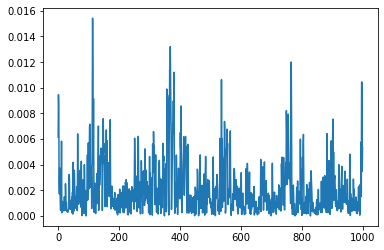

In [19]:
import matplotlib.pyplot as plt

plt.plot([l[0] for l in losses])

### Adhoc Test

In [20]:
model(np.array([0.5]))

[<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.0004243]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.2505546]], dtype=float32)>]